In [0]:
import numpy as np
import pandas as pd #will store columns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [0]:
boston_dataset = load_boston() #declare variable
df = pd.DataFrame(boston_dataset.data, columns = boston_dataset.feature_names)
df['MEDV'] = boston_dataset.target

In [4]:
type(boston_dataset)

sklearn.utils.Bunch

In [5]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.shape

(506, 14)

In [0]:
def plotFeatures(col_list, title):
  plt.figure(figsize = (10,14))
  i = 0
  for col in col_list:
    i+=1
    plt.subplot(7,2,i)
    plt.plot(df[col], df["MEDV"], marker = '.', linestyle= 'none')
    plt.title(title % (col))
    plt.tight_layout()

In [0]:
columns = boston_dataset['feature_names'].tolist()
columns.append('MEDV')

In [11]:
type(columns)

list

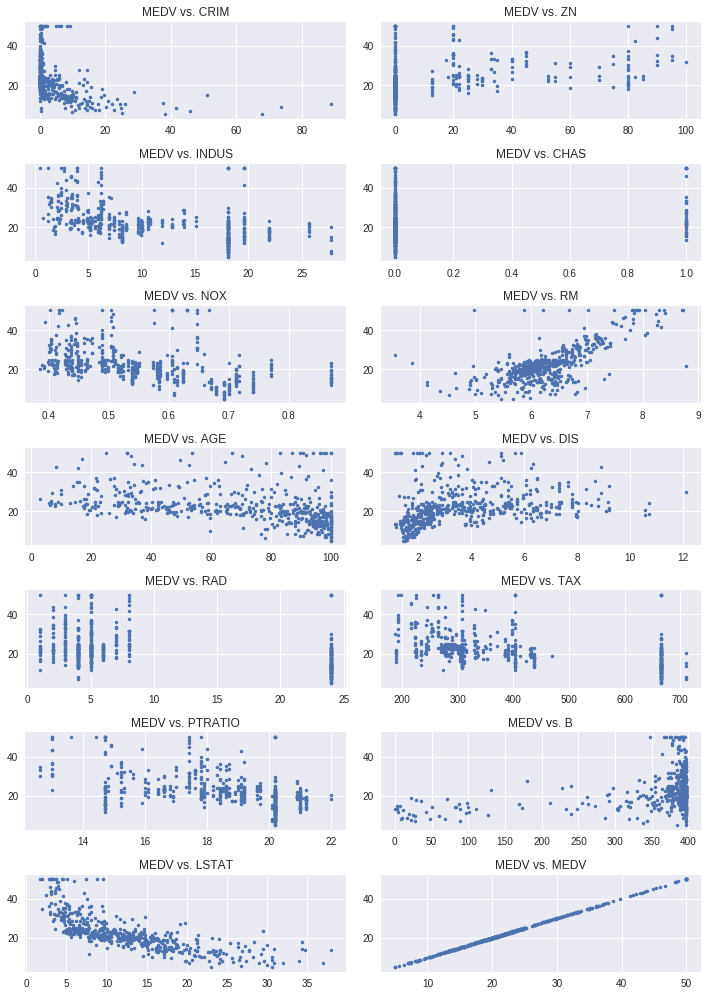

In [12]:
plotFeatures(columns, "MEDV vs. %s")

In [0]:
def predictPrice(x, theta):
  return np.dot(x,theta)

In [0]:
def calculateCost(x, theta, Y):
  prediction = predictPrice(x,theta) #h(x)
  return ((prediction-Y)**2).mean()/2  

In [0]:
def abline(x,theta,Y):
  pred = predictPrice(x,theta)
  plt.xlim(0,10) #range of numbers
  plt.ylim(0,55) #range of the price of the house
  plt.xlabel('No. of Rooms in the house')
  plt.ylabel('Price')
  plt.plot(x[:,1], Y, '.', x[:,1], pred, '-')
  plt.show()

In [0]:
def gradientDescentLinear(alpha,it=5001):
  X = df["RM"]
  Y = df["MEDV"]
  costs = []
  x=np.column_stack((np.ones(len(X)), X))
  theta = np.zeros(2)
  for i in range(it):
    pred = predictPrice(x,theta)
    t0=theta[0] - alpha*(pred-Y).mean()
    t1=theta[1] - alpha*((pred-Y)*x[:,1]).mean()
    theta=np.array([t0,t1])
    J = calculateCost(x,theta,Y)
    costs.append(J)
    if i%1000 == 0 :
      print(f"Iteration: {i+1}, Cost = {J}, theta = {theta}")
      abline(x,theta,Y)
  print("Cost function plot: ")
  plt.plot(np.linspace(0, 5000, num = 5001), costs) #how the function changes after each iteration
  plt.xlabel('No. of Iterations')
  plt.ylabel('J')
  return theta

Iteration: 1, Cost = 219.35658555966455, theta = [1.01397628 6.57427568]


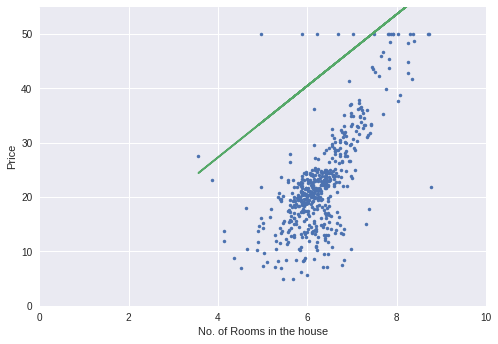

Iteration: 1001, Cost = 24.387864538546133, theta = [-14.17581042   5.88022089]


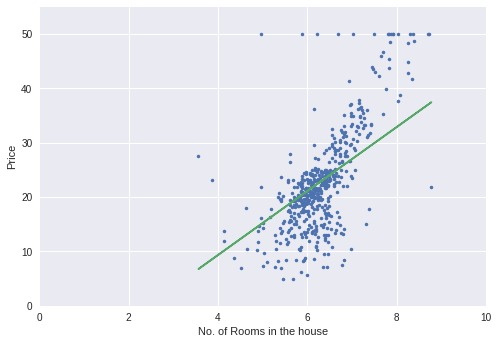

Iteration: 2001, Cost = 22.676887168048758, theta = [-22.74173684   7.22682795]


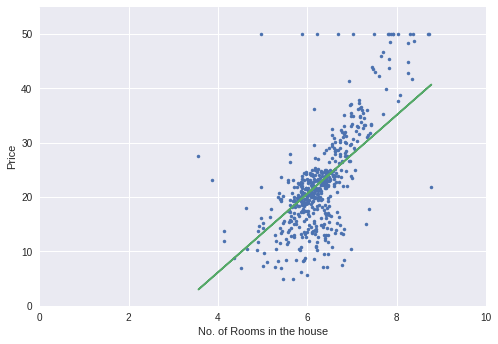

Iteration: 3001, Cost = 22.09725019008395, theta = [-27.72748398   8.01061268]


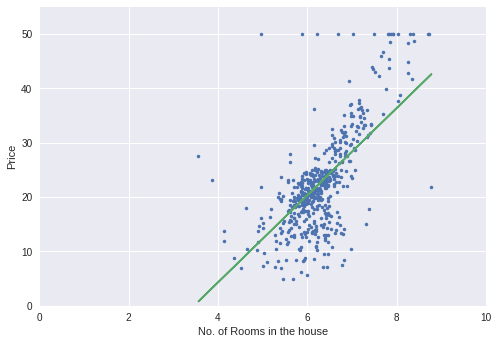

Iteration: 4001, Cost = 21.90088346307896, theta = [-30.6294088    8.46680997]


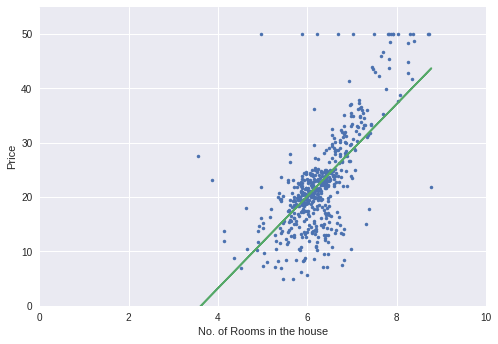

Iteration: 5001, Cost = 21.83435925406446, theta = [-32.3184571    8.73233693]


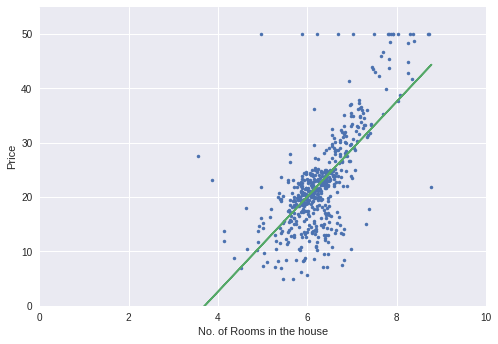

Cost function plot: 


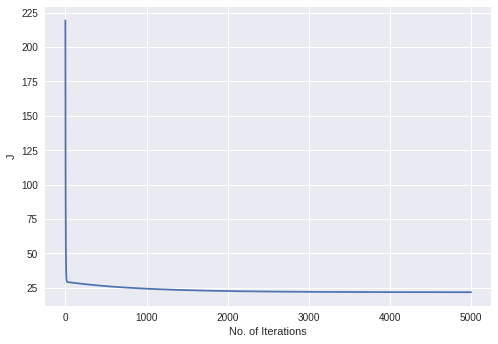

In [17]:
theta = gradientDescentLinear(alpha=0.045, it =5001)

In [0]:
X=np.matrix([[1,5.5]])

In [19]:
predictPrice(X,theta)

matrix([[15.709396]])

LSTAT vs MDEV

In [0]:
def predictPrice2(x, theta):
  return np.dot(x,theta)

In [0]:
def calculateCost2(x, theta, Y):
  prediction = predictPrice2(x, theta)
  return ((prediction - Y)**2).mean()/2

In [0]:
def abline2(x,theta,Y):
  pred = predictPrice(x,theta)
  plt.xlim(0,40)
  plt.ylim(0,55)
  plt.xlabel('% lower status of the population')
  plt.ylabel('Price')
  plt.plot(x[:,1], Y, '.', x[:,1], pred, '-')
  plt.show()

In [0]:
def gradientDescentLinear2(alpha=0.001, iterations = 5001):
  X = df["LSTAT"]
  Y = df["MEDV"]
  costs = [] #array to hold the cost function values after each iteration
  x = np.column_stack((np.ones(len(X)), X)) #stacking the columns of ones (x0) and x1
  theta = np.zeros(2)
  #for each iteration from 0 till 5000 included do the following: 
  for i in range(iterations):
    pred = predictPrice2(x,theta) #predict the price
    #update the parameters theta0 and theta1 (see session 2 for details)
    t0 = theta[0] - alpha*(pred-Y).mean()
    t1 = theta[1] - alpha*((pred-Y)*x[:,1]).mean()
    theta = np.array([t0, t1])
    #calculate the value of the cost function and save it 
    J = calculateCost2(x, theta, Y)
    costs.append(J)
    #show the updates and plot the graph (real data + model built) on 1st, 1001st, 2001st, 3001st, 4001st and 5001st iteration
    if i%1000 == 0:
      print(f"Iteration: {i+1}, Cost = {J}, theta = {theta}")
      abline2(x,theta,Y)
  #at the end plot the cost vs. number of iterations plot to see how fast the model converges/diverges    
  print("Cost function plot: ")
  plt.plot(np.linspace(0,5000, num = 5001), costs)
  plt.xlabel('No. of iterations')
  plt.ylabel('J')
  #return the model parameters
  return theta

Iteration: 1, Cost = 162.7969537236461, theta = [0.11266403 1.18378616]


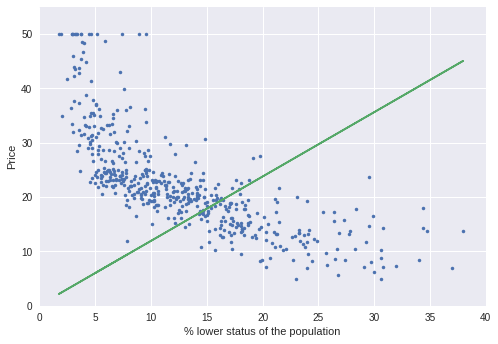

Iteration: 1001, Cost = 32.1593260136144, theta = [24.20454182 -0.32870619]


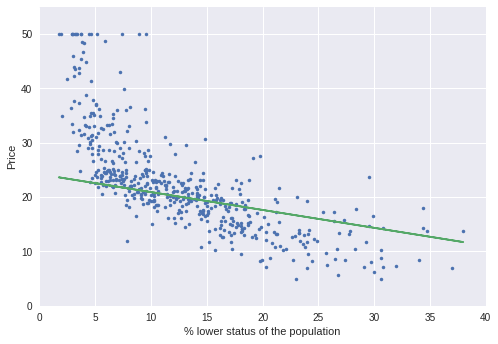

Iteration: 2001, Cost = 20.40763839878019, theta = [31.44431593 -0.76336211]


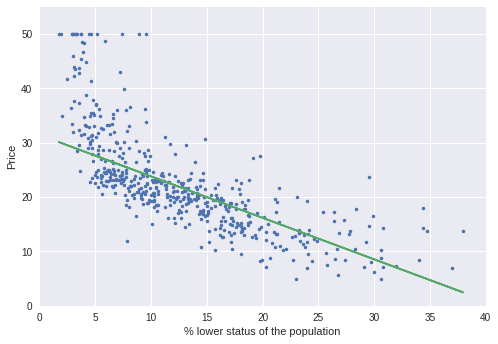

Iteration: 3001, Cost = 19.346757927629262, theta = [33.61956066 -0.89395777]


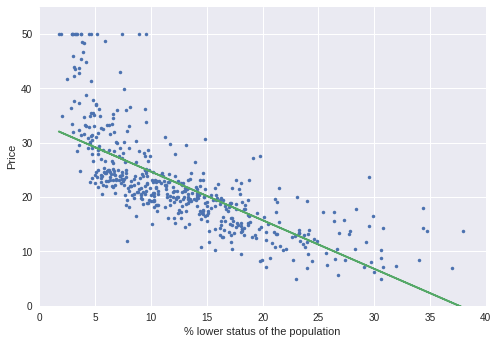

Iteration: 4001, Cost = 19.250987225500637, theta = [34.27312934 -0.93319621]


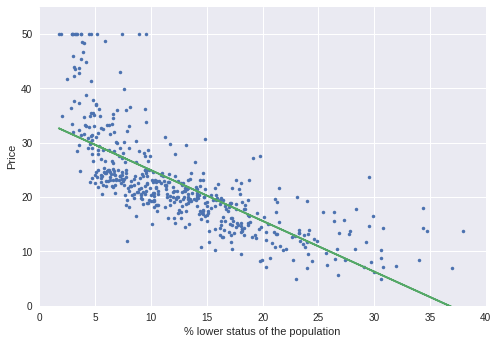

Iteration: 5001, Cost = 19.242341550859937, theta = [34.46949898 -0.9449857 ]


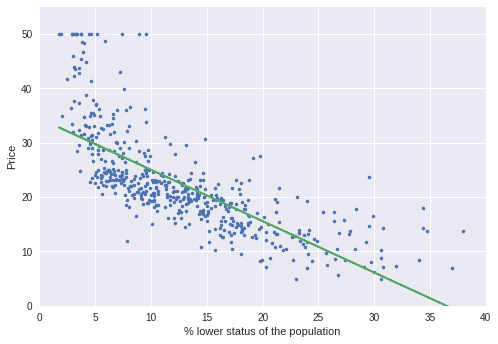

Cost function plot: 


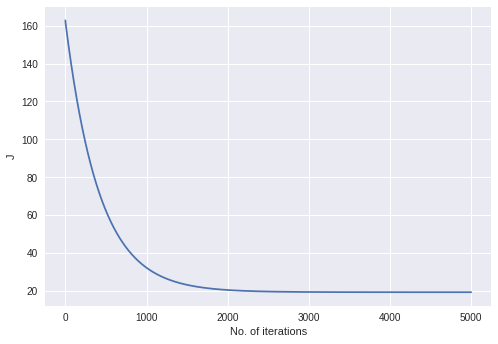

In [62]:
theta = gradientDescentLinear2(alpha = 0.005)

In [0]:
X = np.matrix([[1, 5.33]])

In [64]:
predictPrice2(X, theta)

matrix([[29.4327252]])